# PyTorch for CIFAR10
Here we test svm and softmax classifier.
First init some basic environment.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# SVM classifier
We create lienar classifier and use margin loss.

In [2]:
import torch.optim as optim
import torch.nn as nn
from cifar10.tnt_solver import main
from cifar10.classifiers.linear_classifier import LinearClassifier

svm = LinearClassifier(input_shape=(3, 32, 32))
opt = optim.SGD(svm.parameters(), lr=1e-3, momentum=0)

# train SVM
train the classifier

In [3]:
%%time

import torch.nn.functional as F
history = main(svm, opt, epoch=4, loss_fn=F.multi_margin_loss)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/4, lr:1.00e-03
100%|██████████| 625/625 [00:08<00:00, 71.76it/s, loss:0.5906, acc:28.3625%]
Val loss: 0.5376, accuracy: 32.07%
Epoch: 2/4, lr:1.00e-03
100%|██████████| 625/625 [00:08<00:00, 75.07it/s, loss:0.5381, acc:30.8650%]
Val loss: 0.5243, accuracy: 33.24%
Epoch: 3/4, lr:1.00e-03
100%|██████████| 625/625 [00:08<00:00, 72.26it/s, loss:0.5269, acc:31.6175%]
Val loss: 0.5183, accuracy: 33.48%
Epoch: 4/4, lr:1.00e-03
100%|██████████| 625/625 [00:08<00:00, 72.21it/s, loss:0.5208, acc:32.0675%]
Val loss: 0.5142, accuracy: 34.28%
Test loss: 0.5071, accuracy: 34.37%
CPU times: user 23 s, sys: 8.13 s, total: 31.1 s
Wall time: 51.9 s


# plot svm loss history
We check the classifier by plotting the loss and acc.

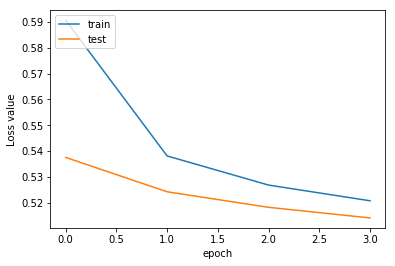

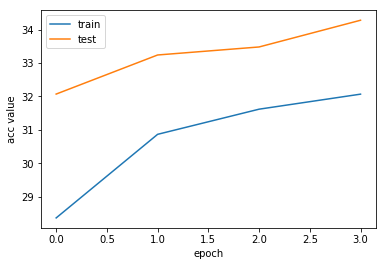

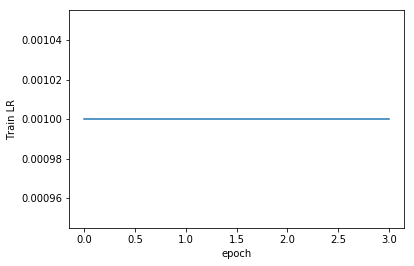

In [4]:
from cifar10.tnt_solver import plot_history
plot_history(history)

# Softmax classifier
Then we create softmax classifier.

In [5]:
softmax = LinearClassifier(input_shape=(3, 32, 32))
opt = optim.SGD(softmax.parameters(), lr=1e-3, momentum=0)
loss_fn = F.cross_entropy

# train softmax

In [6]:
%%time

import torch.nn.functional as F
history = main(softmax, opt, epoch=4, loss_fn=loss_fn)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/4, lr:1.00e-03
100%|██████████| 625/625 [00:08<00:00, 72.07it/s, loss:1.9978, acc:29.1600%]
Val loss: 1.9163, accuracy: 33.04%
Epoch: 2/4, lr:1.00e-03
100%|██████████| 625/625 [00:08<00:00, 69.80it/s, loss:1.9216, acc:32.2875%]
Val loss: 1.8936, accuracy: 34.79%
Epoch: 3/4, lr:1.00e-03
100%|██████████| 625/625 [00:08<00:00, 71.97it/s, loss:1.9045, acc:32.9975%]
Val loss: 1.8815, accuracy: 35.28%
Epoch: 4/4, lr:1.00e-03
100%|██████████| 625/625 [00:09<00:00, 69.05it/s, loss:1.8930, acc:33.5100%]
Val loss: 1.8746, accuracy: 35.42%
Test loss: 1.8598, accuracy: 35.67%
CPU times: user 20.6 s, sys: 7.34 s, total: 28 s
Wall time: 49.9 s


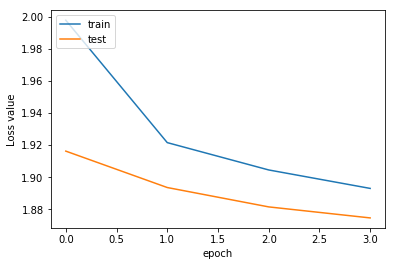

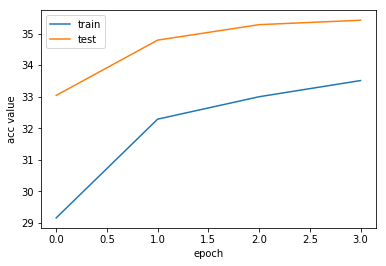

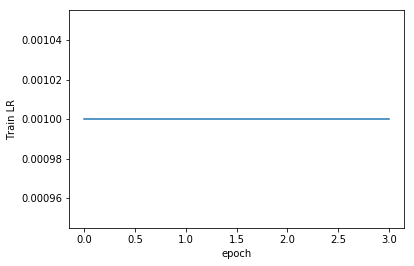

In [7]:
# plot softmax loss history
plot_history(history)